In [4]:
#1: Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# Set plotting style
sns.set(style="whitegrid")

In [11]:
#2: Load Data

file_path = "/Users/jinsyl/ML Class/drug_disintegration_ml/data/raw/final_data_all_excipients.csv"


if not os.path.exists(file_path):
    print(f"❌ File not found at: {file_path}. Please verify the relative path and file name.")
else:
    df = pd.read_csv(file_path)
    print(f"✅ Dataset loaded. Shape: {df.shape}")
    display(df.head())


✅ Dataset loaded. Shape: (1982, 79)


,Molecular Weight,XLogP3-AA,Hydrogen Bond Donor Count,Hydrogen Bond Acceptor Count,Rotational bond count,Topological surface area,Heavy atom count,Complexity,LogS,DOSE,...,Ludipress,Kaolin,Methyl paraben,Camphor,CPE,HARDNESS,FRIABILITY,Drug content,Water absorption ratio,DISINTEGRATION_TIME
0,608.2,7.86,1,5,12,98.6,42,898,-9.01,5.2,...,0.0,0.0,0.0,0,0.0,3.67,0.5000,100.20,206.9,9.5
1,371.8,2.10,2,7,2,136.0,23,634,-4.37,8.0,...,0.0,0.0,0.0,0,0.0,3.50,0.1088,93.60,0.0,372.0
2,371.8,2.10,2,7,2,136.0,23,634,-4.37,8.0,...,0.0,0.0,0.0,0,0.0,3.70,0.1267,99.94,0.0,190.0
3,371.8,2.10,2,7,2,136.0,23,634,-4.37,8.0,...,0.0,0.0,0.0,0,0.0,3.75,0.1188,97.60,0.0,102.0
4,371.8,2.10,2,7,2,136.0,23,634,-4.37,8.0,...,0.0,0.0,0.0,0,0.0,3.50,0.1012,90.97,0.0,252.0


In [15]:
#3: Data Overview

print("\nColumn Types:\n")
print(df.dtypes)

print("\nMissing Values:\n")
print(df.isnull().sum().sort_values(ascending=False).head(5))


Column Types:

Molecular Weight                float64
XLogP3-AA                       float64
Hydrogen Bond Donor Count         int64
Hydrogen Bond Acceptor Count      int64
Rotational bond count             int64
                                 ...   
HARDNESS                        float64
FRIABILITY                      float64
Drug content                    float64
Water absorption ratio          float64
DISINTEGRATION_TIME             float64
Length: 79, dtype: object

Missing Values:

Molecular Weight              0
Acryflow-L                    0
Ocimum sanctum seed powder    0
Sucrose                       0
Neotame                       0
dtype: int64


In [16]:
#Summary Statistics

display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Molecular Weight,1982.0,388.065005,132.712073,122.12,300.0575,358.80,461.0000,1155.30
XLogP3-AA,1982.0,2.703456,1.862722,-2.90,1.5400,2.67,3.8000,7.86
Hydrogen Bond Donor Count,1982.0,2.348133,1.660448,0.00,1.0000,2.00,3.0000,8.00
Hydrogen Bond Acceptor Count,1982.0,5.610494,3.272675,1.00,3.0000,5.00,7.0000,20.00
Rotational bond count,1982.0,6.053986,3.702546,0.00,3.0000,6.00,8.0000,22.00
...,...,...,...,...,...,...,...,...
HARDNESS,1982.0,3.562665,1.266191,0.81,3.0000,3.45,3.9700,21.67
FRIABILITY,1982.0,0.549143,1.011538,0.00,0.3300,0.49,0.6600,27.17
Drug content,1982.0,60.319231,47.746574,0.00,0.0000,97.25,99.1000,105.62
Water absorption ratio,1982.0,32.405415,41.869341,0.00,0.0000,0.00,66.6975,263.35


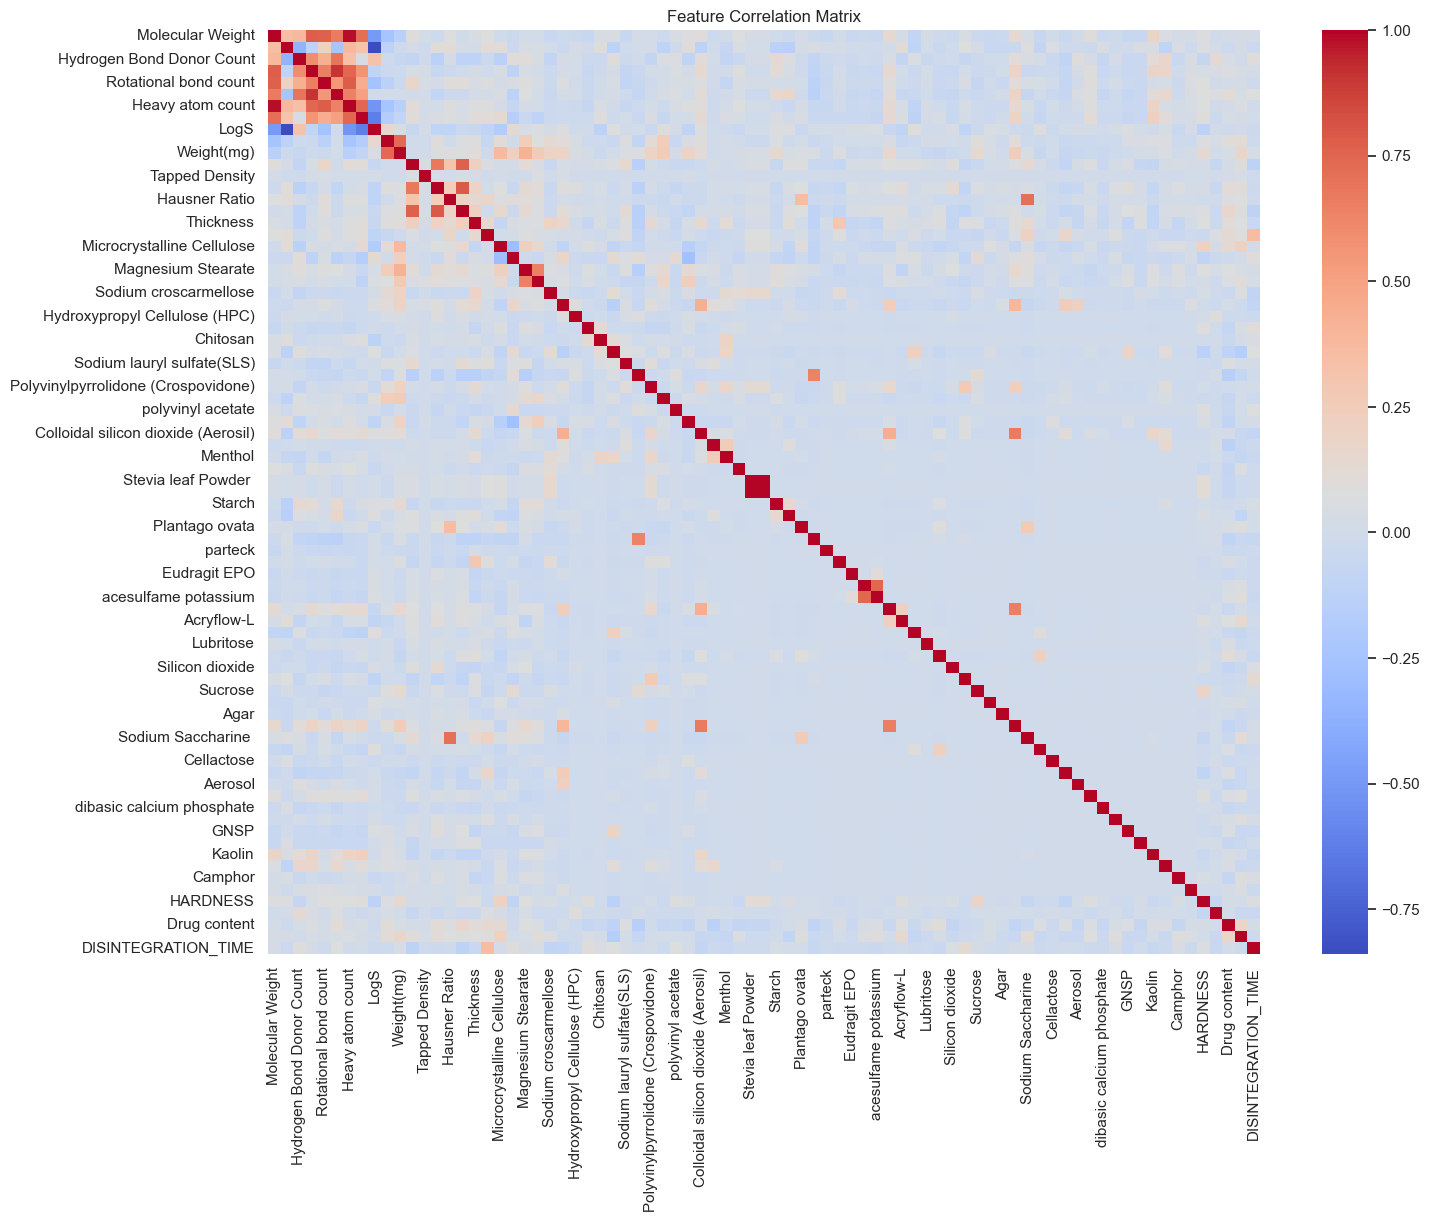

In [18]:
 #Correlation Matrix 
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

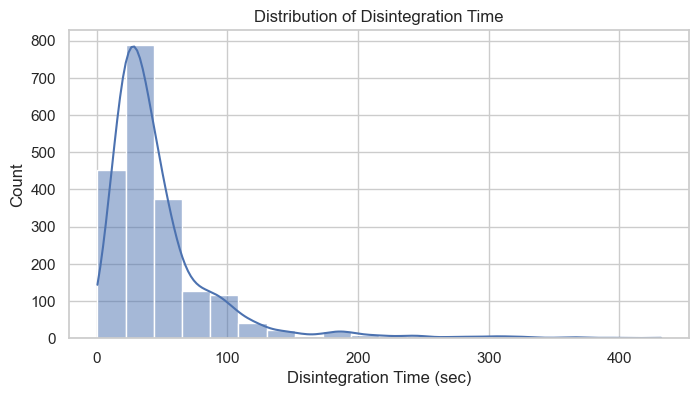

In [24]:
#Target Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['DISINTEGRATION_TIME'], bins=20, kde=True)
plt.title("Distribution of Disintegration Time")
plt.xlabel("Disintegration Time (sec)")
plt.show()

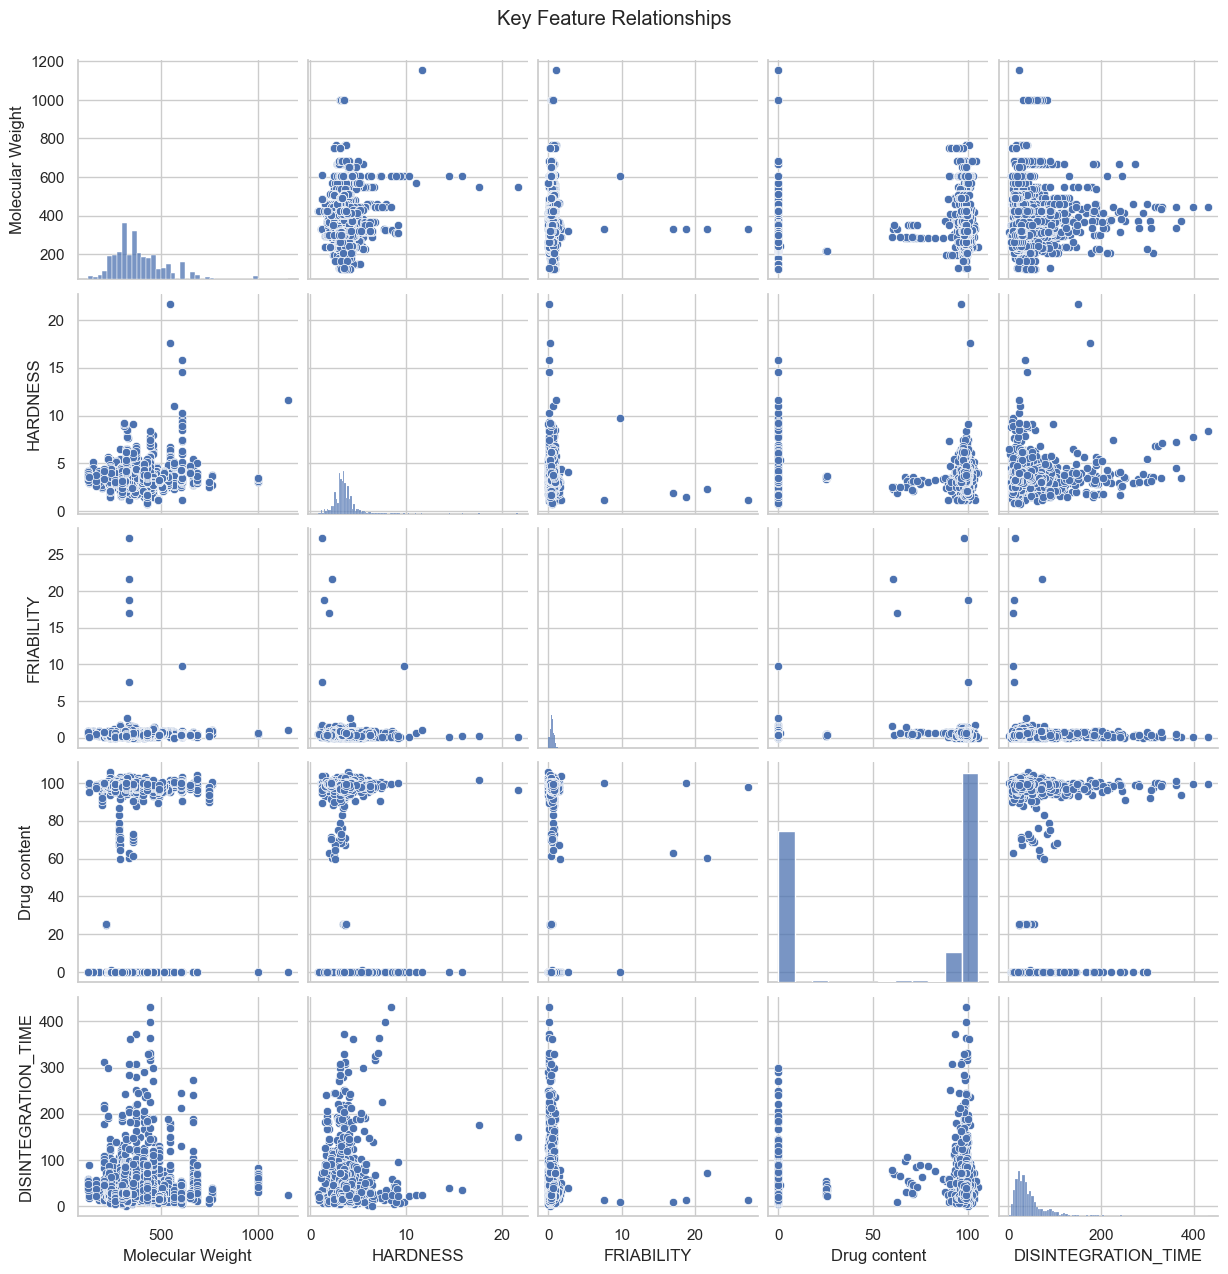

In [25]:
#7: Example Pairplot (optional for EDA)
top_features = ['Molecular Weight','HARDNESS', 'FRIABILITY', 'Drug content', 'DISINTEGRATION_TIME']
sns.pairplot(df[top_features])
plt.suptitle("Key Feature Relationships", y=1.02)
plt.show()
